## Automatic Wave Processing for Rare Seismic Phases ##

**Introduction**:

The programme enables users without deeper knowledge about wave processing or the python package obspy to analyse rare seismic phases. It is based on the assumption that only specific arrays are useful in the analysis of such phases.  As a start point, the user therefore chooses a seismic network from the IRIS, USGS or AusPass catalogue. While the user can choose some processing parameters, others are pre-defined but can be changed or expanded in the source code. Based on the inputs, the programme outputs a series of data and waveform files as well as plots to visualize the data.

**Note**:

The programme creates files and folders. If the user wants to run the programme multiple times, they should either delete the previosly created files and folders or run the programme in a new directory.

**To Test Programme**

This programme should work for any station. Nevertheless, for some networks, there might be no data available. The programme was tested with:

network = "1E"

phase = "PKIKP"

min_magnitude = 6

max_magnitude = 7


**Import all Relevant Modules**

For a user-friendly interface, all function-defining code is stored in additional python files. The code in the jupyter notebook is reduced to a minimum to prevent errors introduced by accidental or careless changes.


In [1]:
import functions as fun
import network_list as nl
import phases_list as pl

**Set up a client for each server**

The programme uses three databases (Iris, USGS and AusPass). Every data request is first processed by the IRIS Client, then USGS, then AusPass.

In [2]:
iris, usgs, auspass = fun.set_up_clients()

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/seis/danielle/.local/lib/python3.8/site-packages/obspy/clients/fdsn/client.py", line 1543, in run
    code, data = download_url(
  File "/home/seis/danielle/.local/lib/python3.8/site-packages/obspy/clients/fdsn/client.py", line 1929, in download_url
    data = f.read()
  File "/usr/lib/python3.8/gzip.py", line 292, in read
    return self._buffer.read(size)
  File "/usr/lib/python3.8/gzip.py", line 479, in read
    if not self._read_gzip_header():
  File "/usr/lib/python3.8/gzip.py", line 427, in _read_gzip_header
    raise BadGzipFile('Not a gzipped file (%r)' % magic)
gzip.BadGzipFile: Not a gzipped file (b'a\r')


**User chooses a station**
1) User is asked to choose a station using the fdsn code. 
2) If the station does not exist, the user is provided with a table of all available stations for help.
3) Once the user has successfully chosen an available network code, they are provided with a list of all networks with this code.
4) The user then chooses one of those by defining the start and end time. 
5) The programme makes sure that the star and end time input is valid and corresponds to one station.
6) In the last step, the programme downloads the station metadata from IRIS, USGS or AusPass and creates a file for future reference. The programme indicates where the data was taken from.


In [3]:
station_metadata, starttime, endtime, network = fun.choose_station(iris, usgs, auspass)

Please choose one of the following networks by entering the start and end time. If no end_date exists (station still running), enter None.


,fdsn_code,start_date,end_date,name,doi
0,1E,2008-01-01,2008-12-31,Postsismic experiment after 8th June...,10.7914/SN/1E_2008
1,1E,2010-01-01,2012-12-31,ELLITE,
2,1E,2013-01-01,2014-12-31,Southern Queensland Spiral Array - 2...,10.7914/SN/1E_2013
3,1E,2015-01-01,2016-12-31,Crustal Magma Plumbing of the Santor...,10.7914/SN/1E_2015
4,1E,2017-04-08,2017-05-04,Play Fairway Analysis: Structurally ...,10.7914/SN/1E_2017
5,1E,2018-01-01,2026-12-31,GSC-BCOGC Induced Seismicity Study,


Endtime must be in valid format (YYYY-MM-DD)
No data available from IRIS.
No data available from USGS.
Data taken from AusPass.
Successfully downloaded station metadata.
Inventory created at 2023-06-06T23:04:46.632494Z
	Sending institution: SeisComP (ANU-RSES)
	Contains:
		Networks (1):
			1E
		Stations (16):
			1E.SQA01 (Binda, Bollon, QLD)
			1E.SQA02 (Carbene, Bollon, QLD)
			1E.SQA03 (Carbene 2, Bollon, QLD)
			1E.SQA04 (Carbene 3, Bollon, QLD)
			1E.SQA05 (Bengarcia, Bollon, QLD)
			1E.SQA06 (Koonawarra, Bollon, QLD)
			1E.SQA07 (Bindu, Bollon, QLD)
			1E.SQA08 (Shirlo, Bollon, QLD)
			1E.SQA09 (Nebinedulla, Bollon, QLD)
			1E.SQA10 (Sunset Valley, Bollon, QLD)
			1E.SQA11 (Vincentia, Bollon, QLD)
			1E.SQA12 (Binda 2, Bollon, QLD)
			1E.SQA13 (Binda 3, Bollon, QLD)
			1E.SQA14 (Marango, Bollon, QLD)
			1E.SQA15 (Arakoola, Bollon, QLD)
			1E.SQA16 (Bundalloch, Bollon, QLD)
		Channels (16):
			1E.SQA01..BHZ, 1E.SQA02..BHZ, 1E.SQA03..BHZ, 1E.SQA04..BHZ, 
			1E.SQA05..BHZ, 1E.SQA06..

**User chooses a Seismic Phase**
1) User chooses a phase they would like to observe. 
2) If the input is inavlid, the user is provided with a list of all available phases for help.
3) Once a phase was chosen successfully, the programme saves the corresponding processing parameters for future use.

In [4]:
phase_name, min_distance, max_distance, min_filter, max_filter = fun.choose_phase()

Chosen phase: PKIKP


**User chooses Event Parameters and Creation of Event Catalogue**
1) Programme gets latitude and logitude for chosen station
2) User chooses minimum and maximum magnitude. A magnitude between 6 and 7 (or above) is recommended (both for scientific and practical reasons). Otherwise too many events will be available. Input is validated and user is asked to change inputs until a valid combination is achieved.
3) Programme refines start and end time to get a more accurate time window.
4) Event catalogue is downloaded (based on pre-defined phase parameters and parameters chosedn by user) from IRIS, USGS or AusPass and saved as a xml file for future reference.
5) If the catalogue contains more than 50 events, the user is asked to choose different parameters or a different station to prevent problems with the processing power of the computer.
5) A list of events is printed and a plot is displayed.


Minimum magnitude must be a number between 0 and 10.
Maximum magnitude must be a number between 0 and 10.
IRIS was successful.
22 Event(s) in Catalog:
2014-05-24T09:25:03.190000Z | +40.276,  +25.370 | 6.9  MW
2014-07-07T11:23:54.780000Z | +14.724,  -92.461 | 6.9  MW
2014-08-24T23:21:43.400000Z | -14.589,  -73.450 | 6.8  MW
2014-08-24T23:21:41.700000Z | -14.520,  -73.535 | 6.8  MW
2014-04-11T20:29:13.610000Z | +11.720,  -86.014 | 6.6  MW
2014-12-08T08:54:52.520000Z |  +7.940,  -82.686 | 6.6  MW
2014-05-13T06:35:24.530000Z |  +7.145,  -82.240 | 6.5  MW
2014-02-18T09:27:14.830000Z | +14.596,  -58.972 | 6.5  MW
2014-07-29T10:46:13.600000Z | +17.810,  -95.501 | 6.4  MW
2014-03-15T23:51:32.300000Z |  -5.672,  -80.935 | 6.3  MW
2014-01-13T04:01:04.530000Z | +18.992,  -66.868 | 6.3  MW
2014-03-02T09:37:54.760000Z | +12.589,  -87.704 | 6.2  MW
2014-01-26T13:55:43.330000Z | +38.191,  +20.507 | 6.1  MW
2014-04-10T23:27:45.030000Z | +12.434,  -86.330 | 6.1  MW
2014-03-15T08:59:20.160000Z | -14.101

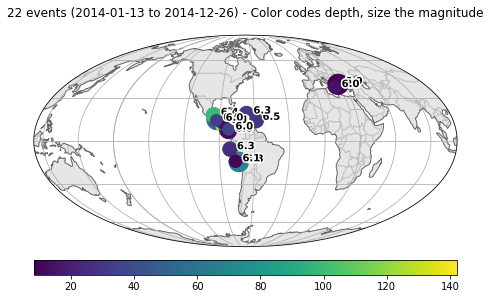

In [5]:
latitude, longitude, event_metadata = fun.choose_events(iris, usgs, station_metadata, starttime, endtime, min_distance, max_distance)

**Download Raw Waveforms for Processing**
1) Creates a new folder to store raw waveforms.
2) Attempts to download raw waveform data for each event from IRIS, USGS and AusPass. For some stations no data will be available. They will automatically be skipped.
3) Save raw waveform data files in folder.



In [6]:
event_data = fun.download_raw_waveforms(event_metadata, latitude, longitude, iris, usgs, auspass, network, phase_name)

FileExistsError: [Errno 17] File exists: './raw_waveforms'

**Process Waveforms**
1) Create a new folder to store processed waveforms.
2) Processes raw waveforms with parameters defined when choosing the phase.
3) Saves processed waveforms in folder.

Note: Depending on the number of events, this step can take a few minutes.

In [ ]:
fun.process_waveforms(station_metadata, event_data, min_filter, max_filter)

**Get Waveforms trimmed to Phase Arrival and Stacks**
1) Use calculated (theoretical) arrival time to trim the waveforms. 
2) For some waveforms no data will be available. For some waveforms the creation of a linear stack does not work. They will be skipped too.
3) Plot waveforms and stacks.

Note: Depending on the number of events, this step can take a few minutes.

In [ ]:
fun.get_phase_waveforms(event_data)